<a href="https://colab.research.google.com/github/AshwinDeshpande96/Employee-Attrition-Prediction/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pprint import pprint

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df = pd.read_csv("attrition_data.csv")

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate($),Department,DistanceFromHome,Education,EducationField,EmployeeNumber#,EnvironmentSatisfaction,Gender,JobLevel,Job+Role,JobSatisfaction,MaritalStatus,MonthlyIncome($),NumCompaniesWorked#,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,2,Sales Executive,4,Single,5993,8.0,Yes,11,3,0.0,8.0,0.0,1,6.0,4.0,NaN,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,2,Research Scientist,2,Married,5130,1.0,No,23,4,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,3,4,Male,1,Laboratory Technician,3,Single,2090,6.0,Yes,15,3,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,4,Female,1,Research Scientist,3,Married,2909,1.0,Yes,11,3,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,5,1,Male,1,Laboratory Technician,2,Married,3468,9.0,No,12,3,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2418 non-null   int64  
 1   Attrition                2418 non-null   object 
 2   BusinessTravel           2418 non-null   object 
 3   DailyRate($)             2418 non-null   int64  
 4   Department               2418 non-null   object 
 5   DistanceFromHome         2418 non-null   int64  
 6   Education                2418 non-null   int64  
 7   EducationField           2418 non-null   object 
 8   EmployeeNumber#          2418 non-null   int64  
 9   EnvironmentSatisfaction  2418 non-null   int64  
 10  Gender                   2418 non-null   object 
 11  JobLevel                 2418 non-null   int64  
 12  Job+Role                 2418 non-null   object 
 13  JobSatisfaction          2418 non-null   int64  
 14  MaritalStatus           

## Exploratory Data Analysis

**What is the primary key?**

In [ ]:
df["EmployeeNumber#"].nunique() == df.shape[0]

True

**Class Imbalance?**

In [ ]:
df["Attrition"].value_counts(dropna=False, normalize=True).to_frame()

,Attrition
No,0.509926
Yes,0.490074


### Variables

In [ ]:
feature_columns = list(df.columns)
## Remove EmployeeNumber# since it is only a row identifier and not a feature
feature_columns.remove("EmployeeNumber#")
## Remove Attrition since this is the target variable
feature_columns.remove("Attrition")

In [ ]:
pprint(feature_columns)

['Age',
 'BusinessTravel',
 'DailyRate($)',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobLevel',
 'Job+Role',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome($)',
 'NumCompaniesWorked#',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']


#### Numeric Variables

In [ ]:
df_numeric = df[feature_columns].select_dtypes(include=np.number)
## Saving numeric columns in a list
numeric_feature_columns = list(df_numeric.columns)

df_numeric.describe()

,Age,DailyRate($),DistanceFromHome,Education,EnvironmentSatisfaction,JobLevel,JobSatisfaction,MonthlyIncome($),NumCompaniesWorked#,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2418.000000,2398.000000,2418.000000,2418.000000,2392.000000,2417.000000,2416.000000,2418.000000,2416.000000,2410.000000,2406.000000,2415.000000
mean,37.836642,800.075269,11.597601,2.937965,2.618693,2.418114,2.632754,8093.585194,3.461218,16.278743,3.294458,1.072742,14.536202,2.875000,2.678246,11.978063,6.123651,4.337905,5.858799
std,10.524367,403.044884,8.755386,1.207941,1.117143,1.309127,1.108863,5421.971650,2.803530,4.176006,0.455893,1.021587,10.411546,1.594796,0.890272,10.702679,4.983874,4.676845,4.774919
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,453.500000,4.000000,2.000000,2.000000,1.000000,2.000000,3565.500000,1.000000,13.000000,3.000000,0.000000,6.000000,2.000000,2.000000,4.000000,2.000000,0.000000,2.000000
50%,37.000000,800.000000,9.000000,3.000000,3.000000,2.000000,3.000000,6260.000000,3.000000,15.000000,3.000000,1.000000,11.000000,3.000000,3.000000,8.000000,5.000000,2.000000,5.000000
75%,46.000000,1148.750000,19.000000,4.000000,4.000000,3.000000,4.000000,11954.750000,6.000000,19.000000,4.000000,2.000000,21.000000,4.000000,3.000000,19.000000,9.000000,7.000000,9.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Ordinal variables

In [ ]:
feature_cardinality = [(num_feature, df[num_feature].nunique()) for num_feature in numeric_feature_columns]
sorted(feature_cardinality, key=lambda tup: tup[1])

[('PerformanceRating', 2),
 ('EnvironmentSatisfaction', 4),
 ('JobSatisfaction', 4),
 ('StockOptionLevel', 4),
 ('WorkLifeBalance', 4),
 ('Education', 5),
 ('JobLevel', 5),
 ('TrainingTimesLastYear', 7),
 ('NumCompaniesWorked#', 10),
 ('PercentSalaryHike', 15),
 ('YearsSinceLastPromotion', 16),
 ('YearsWithCurrManager', 18),
 ('YearsInCurrentRole', 19),
 ('DistanceFromHome', 29),
 ('TotalWorkingYears', 41),
 ('YearsAtCompany', 41),
 ('Age', 43),
 ('DailyRate($)', 1152),
 ('MonthlyIncome($)', 2212)]

In [ ]:
df["PerformanceRating"].value_counts()

3    1706
4     712
Name: PerformanceRating, dtype: int64

In [ ]:
df["EnvironmentSatisfaction"].value_counts()

3    688
4    677
1    546
2    507
Name: EnvironmentSatisfaction, dtype: int64

In [ ]:
df["JobSatisfaction"].value_counts()

3    692
4    681
1    524
2    521
Name: JobSatisfaction, dtype: int64

In [ ]:
df["StockOptionLevel"].value_counts()

0.0    848
1.0    841
2.0    384
3.0    319
Name: StockOptionLevel, dtype: int64

In [ ]:
df["WorkLifeBalance"].value_counts()

3    1143
2     581
4     397
1     297
Name: WorkLifeBalance, dtype: int64

In [ ]:
df["Education"].value_counts()

3    739
4    584
2    476
1    374
5    245
Name: Education, dtype: int64

In [ ]:
df["JobLevel"].value_counts()

1    742
2    715
3    412
4    306
5    243
Name: JobLevel, dtype: int64

**the above features are ordinal, i.e. cateogrical variable who have ordered values**
* we will therefore do one-hot encoding later

In [ ]:
ordinal_feature_columns = ["PerformanceRating", "EnvironmentSatisfaction", "JobSatisfaction", "StockOptionLevel", "WorkLifeBalance", "JobLevel"]

In [ ]:
for ord_feature in ordinal_feature_columns:
    numeric_feature_columns.remove(ord_feature)

In [ ]:
pprint(numeric_feature_columns)

['Age',
 'DailyRate($)',
 'DistanceFromHome',
 'Education',
 'MonthlyIncome($)',
 'NumCompaniesWorked#',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']


#### Categorical Variables

In [ ]:
categorical_feature_columns = [col for col in feature_columns if col not in numeric_feature_columns]
pprint(categorical_feature_columns)

['BusinessTravel',
 'Department',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobLevel',
 'Job+Role',
 'JobSatisfaction',
 'MaritalStatus',
 'OverTime',
 'PerformanceRating',
 'StockOptionLevel',
 'WorkLifeBalance']


**We will convert these categorical variables to one hot encoding later**

### Any null values?

In [ ]:
missing_data_count = df.isna().sum()
missing_data_count[missing_data_count>0]

NumCompaniesWorked#        20
StockOptionLevel           26
TotalWorkingYears           1
TrainingTimesLastYear       2
YearsAtCompany              2
YearsInCurrentRole          8
YearsSinceLastPromotion    12
YearsWithCurrManager        3
dtype: int64

In [ ]:
print(f"We have {(df.isna().sum() > 0).sum()} missing value columns") 

We have 8 missing value columns


#### NumCompaniesWorked

Why is data missing?



* Option 1: Add another column named isNumCompaniesWorkedMissing that could 
provide more info: 
    * Would some people have been reluctant to provide this information?
    * NumCompaniesWorked can be used to inform attrition
* Option 2: Drop column: No, just 20 are missing
* Option 3: Drop rows: No, other columns have data
* Option 4: Impute
    * Mean 
    * Median
    * Model <-- best option: [Mention Why]

In [ ]:
columns_to_mean_impute = []
columns_to_most_freq_impute = []

In [ ]:
df["NumCompaniesWorked#"].value_counts(dropna=False)

1.0    616
3.0    266
0.0    261
4.0    245
2.0    237
7.0    163
9.0    157
6.0    154
8.0    153
5.0    146
NaN     20
Name: NumCompaniesWorked#, dtype: int64

In [ ]:
df["isNumCompaniesWorkedMissing"] = df["NumCompaniesWorked#"].isna()
categorical_feature_columns.append("isNumCompaniesWorkedMissing")

In [ ]:
columns_to_most_freq_impute.append("NumCompaniesWorked#")

#### StockOptionLevel

In [ ]:
print(f"We have {df['StockOptionLevel'].isna().sum()} missing")

We have 26 missing


In [ ]:
df[df['StockOptionLevel'].isna()]

,Age,Attrition,BusinessTravel,DailyRate($),Department,DistanceFromHome,Education,EducationField,EmployeeNumber#,EnvironmentSatisfaction,Gender,JobLevel,Job+Role,JobSatisfaction,MaritalStatus,MonthlyIncome($),NumCompaniesWorked#,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,isNumCompaniesWorkedMissing
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,19,1,Female,4,Manager,4,Married,15427,2.0,No,16,3,NaN,31.0,3.0,3,25.0,8.0,3.0,7.0,False
19,38,No,Travel_Rarely,371,Research & Development,2,3,Life Sciences,20,4,Male,1,Research Scientist,4,Single,3944,5.0,Yes,11,3,NaN,6.0,3.0,3,3.0,2.0,1.0,2.0,False
26,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,27,2,Female,1,Research Scientist,1,Single,3919,1.0,Yes,22,4,NaN,10.0,5.0,3,10.0,2.0,6.0,7.0,False
181,34,No,Travel_Rarely,629,Research & Development,27,2,Medical,182,4,Female,1,Research Scientist,2,Single,2311,2.0,No,15,3,NaN,9.0,3.0,3,3.0,2.0,1.0,2.0,False
182,41,Yes,Travel_Rarely,1356,Sales,20,2,Marketing,183,2,Female,1,Sales Representative,2,Single,3140,1.0,Yes,22,4,NaN,4.0,5.0,2,4.0,3.0,0.0,2.0,False
236,33,Yes,Travel_Rarely,465,Research & Development,2,2,Life Sciences,237,1,Female,1,Laboratory Technician,1,Married,2707,7.0,No,20,4,NaN,13.0,3.0,4,9.0,7.0,1.0,7.0,False
237,52,No,Non-Travel,771,Sales,2,4,Life Sciences,238,1,Male,5,Manager,3,Single,19068,1.0,Yes,18,3,NaN,33.0,2.0,4,33.0,7.0,15.0,12.0,False
241,32,No,Non-Travel,976,Sales,26,4,Marketing,242,3,Male,2,Sales Executive,4,Married,4465,0.0,No,18,3,NaN,4.0,2.0,3,3.0,2.0,2.0,2.0,False
285,37,No,Travel_Rarely,1372,Research & Development,1,3,Life Sciences,286,4,Female,1,Research Scientist,4,Single,2115,1.0,No,12,3,NaN,17.0,3.0,3,17.0,12.0,5.0,7.0,False
290,49,No,Travel_Frequently,636,Research & Development,10,4,Life Sciences,291,3,Female,5,Research Director,1,Single,18665,9.0,Yes,11,3,NaN,22.0,4.0,3,3.0,2.0,1.0,2.0,False


In [ ]:
df["StockOptionLevel"].value_counts(dropna=False)

0.0    848
1.0    841
2.0    384
3.0    319
NaN     26
Name: StockOptionLevel, dtype: int64


* Option 1: Add another column named isStockOptionLevelMissing that could 
provide more info: 
    * Would some people have been reluctant to provide this information?
    * No, doesn't seem like missing data signifies attritition
* Option 2: Drop column: No, just 26 are missing
* Option 3: Drop rows: No, other columns have data
* Option 4: Impute
    * Mean, no its a categorical value
    * Median, no its a categorical value
    * Mode <-- yes

In [ ]:
columns_to_most_freq_impute.append("StockOptionLevel")

#### TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsWithCurrManager


* Option 1: Add another column is[col_name]Missing that could 
provide more info: 
    * Would some people have been reluctant to provide this information?
    * No, since there are only very few data points missing, its a technical error
* Option 2: Drop column: No, only few missing
* Option 3: Drop rows: No, other columns have data
* Option 4: Impute
    * Mean <-- best option: Numeric values [Mention Why]
    * Median
    * Mode

In [ ]:
columns_to_mean_impute.append("TotalWorkingYears")
columns_to_mean_impute.append("TrainingTimesLastYear")
columns_to_mean_impute.append("YearsAtCompany")
columns_to_mean_impute.append("YearsWithCurrManager")

In [ ]:
df[df["YearsInCurrentRole"].isna()]

,Age,Attrition,BusinessTravel,DailyRate($),Department,DistanceFromHome,Education,EducationField,EmployeeNumber#,EnvironmentSatisfaction,Gender,JobLevel,Job+Role,JobSatisfaction,MaritalStatus,MonthlyIncome($),NumCompaniesWorked#,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,isNumCompaniesWorkedMissing
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,7,3,Female,1,Laboratory Technician,1,Married,2670,4.0,Yes,20,4,3.0,12.0,3.0,2,1.0,NaN,0.0,0.0,False
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,8,4,Male,1,Laboratory Technician,3,Divorced,2693,1.0,No,22,4,1.0,1.0,2.0,3,1.0,NaN,0.0,0.0,False
204,38,Yes,Travel_Rarely,1180,Research & Development,29,1,Medical,205,2,Male,2,Healthcare Representative,1,Married,6673,7.0,Yes,19,3,0.0,17.0,2.0,3,1.0,NaN,NaN,NaN,False
258,51,No,Travel_Rarely,833,Research & Development,1,3,Life Sciences,259,3,Male,1,Research Scientist,4,Married,2723,1.0,No,11,3,0.0,1.0,0.0,2,1.0,NaN,NaN,0.0,False
471,38,No,Travel_Rarely,1495,Research & Development,10,3,Medical,472,3,Female,2,Healthcare Representative,3,Married,9824,3.0,No,19,3,1.0,18.0,4.0,3,1.0,NaN,NaN,0.0,False
761,36,Yes,Travel_Rarely,660,Research & Development,15,3,Other,762,1,Male,2,Laboratory Technician,3,Divorced,4834,7.0,No,14,3,1.0,9.0,3.0,2,1.0,NaN,NaN,0.0,False
1338,30,Yes,Travel_Rarely,945,Sales,9,3,Medical,1339,2,Male,1,Sales Representative,4,Single,1081,1.0,No,13,3,0.0,1.0,3.0,2,1.0,NaN,0.0,0.0,False
1339,22,Yes,Travel_Rarely,391,Research & Development,7,1,Life Sciences,1340,4,Male,1,Research Scientist,2,Single,2472,1.0,Yes,23,4,0.0,1.0,2.0,3,1.0,NaN,0.0,0.0,False


In [ ]:
YearsInCurrentRoleMissing = df["YearsInCurrentRole"].value_counts(dropna=False).to_frame().reset_index()
YearsInCurrentRoleMissing.columns = ["YearsInCurrentRole", "count"]
YearsInCurrentRoleMissing.sort_values("YearsInCurrentRole")

,YearsInCurrentRole,count
1,0.0,286
7,1.0,104
0,2.0,419
3,3.0,185
4,4.0,158
10,5.0,77
8,6.0,86
2,7.0,280
5,8.0,150
6,9.0,105


* Option 1: Add another column isYearsInCurrentRoleMissing that could 
provide more info: 
    * Would some people have been reluctant to provide this information?
    * Maybe #TODO: Come back to this later
* Option 2: Drop column: No, only few missing
* Option 3: Drop rows: No, other columns have data
* Option 4: Impute
    * Mean <-- best option: [Mention Why]
    * Median
    * Mode

#### YearsSinceLastPromotion & YearsInCurrentRole

* Option 1: Add another column isYearsSinceLastPromotionMissing & isYearsInCurrentRoleMissing that could 
provide more info: 
    * Would some people have been reluctant to provide this information?
    * Yes, people wouldn't want this info public
    * all of those have a performance rating of 3
* Option 2: Drop column: No, only few missing
* Option 3: Drop rows: No, other columns have data
* Option 4: Impute
    * Mean
    * Median
    * Mode <-- Best option

In [ ]:
df[df["YearsSinceLastPromotion"].isna()]

,Age,Attrition,BusinessTravel,DailyRate($),Department,DistanceFromHome,Education,EducationField,EmployeeNumber#,EnvironmentSatisfaction,Gender,JobLevel,Job+Role,JobSatisfaction,MaritalStatus,MonthlyIncome($),NumCompaniesWorked#,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,isNumCompaniesWorkedMissing
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,2,Sales Executive,4,Single,5993,8.0,Yes,11,3,0.0,8.0,0.0,1,6.0,4.0,NaN,5.0,False
204,38,Yes,Travel_Rarely,1180,Research & Development,29,1,Medical,205,2,Male,2,Healthcare Representative,1,Married,6673,7.0,Yes,19,3,0.0,17.0,2.0,3,1.0,NaN,NaN,NaN,False
258,51,No,Travel_Rarely,833,Research & Development,1,3,Life Sciences,259,3,Male,1,Research Scientist,4,Married,2723,1.0,No,11,3,0.0,1.0,0.0,2,1.0,NaN,NaN,0.0,False
282,29,No,Travel_Frequently,442,Sales,2,2,Life Sciences,283,2,Male,2,Sales Executive,4,Single,4554,1.0,No,18,3,0.0,10.0,3.0,2,10.0,7.0,NaN,9.0,False
283,55,No,Travel_Rarely,147,Research & Development,20,2,Technical Degree,284,2,Male,2,Laboratory Technician,4,Married,5415,3.0,Yes,19,3,1.0,12.0,4.0,3,10.0,7.0,NaN,8.0,False
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,302,4,Female,1,Sales Representative,3,Single,1200,1.0,No,12,3,0.0,0.0,2.0,3,0.0,0.0,NaN,NaN,False
471,38,No,Travel_Rarely,1495,Research & Development,10,3,Medical,472,3,Female,2,Healthcare Representative,3,Married,9824,3.0,No,19,3,1.0,18.0,4.0,3,1.0,NaN,NaN,0.0,False
569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,570,1,Male,3,Sales Executive,1,Single,7587,1.0,No,15,3,0.0,10.0,1.0,3,10.0,7.0,NaN,9.0,False
761,36,Yes,Travel_Rarely,660,Research & Development,15,3,Other,762,1,Male,2,Laboratory Technician,3,Divorced,4834,7.0,No,14,3,1.0,9.0,3.0,2,1.0,NaN,NaN,0.0,False
1459,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1460,4,Male,2,Laboratory Technician,2,Married,4025,4.0,Yes,13,3,1.0,10.0,2.0,3,4.0,3.0,NaN,3.0,False


In [ ]:
columns_to_most_freq_impute.append("YearsSinceLastPromotion")
df["isYearsSinceLastPromotionMissing"] = df["YearsSinceLastPromotion"].isna()
categorical_feature_columns.append("isYearsSinceLastPromotionMissing")

In [ ]:
columns_to_most_freq_impute.append("YearsInCurrentRole")
df["isYearsInCurrentRoleMissing"] = df["YearsInCurrentRole"].isna()
categorical_feature_columns.append("isYearsInCurrentRoleMissing")

### Attributes that can be removed

#### Gender

* this variable can be used to do analysis of impact of gender of attrition (descriptive statistics)
* however, this cannot be used in predictive statisitics to make it fair for both genders

In [ ]:
columns_to_drop = ["Gender"]

In [ ]:
for col_to_drop in columns_to_drop:
    if col_to_drop in categorical_feature_columns:
        categorical_feature_columns.remove(col_to_drop)
    else:
        numeric_feature_columns.remove(col_to_drop)

## Train Test Split

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
target_column = "Attrition"
all_features = numeric_feature_columns+categorical_feature_columns

In [ ]:
X = df[all_features]
y = df[target_column]

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

#### Validation for Hyperparameter tuning (TODO)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Preprocessing

### Cardinality

In [ ]:
cat_feature_cardinality = [(cat_ft, X_train[cat_ft].nunique()) for cat_ft in categorical_feature_columns]
sorted(cat_feature_cardinality, key=lambda tup: tup[1])

[('OverTime', 2),
 ('PerformanceRating', 2),
 ('isNumCompaniesWorkedMissing', 2),
 ('isYearsSinceLastPromotionMissing', 2),
 ('isYearsInCurrentRoleMissing', 2),
 ('BusinessTravel', 3),
 ('Department', 3),
 ('MaritalStatus', 3),
 ('EnvironmentSatisfaction', 4),
 ('JobSatisfaction', 4),
 ('StockOptionLevel', 4),
 ('WorkLifeBalance', 4),
 ('JobLevel', 5),
 ('EducationField', 6),
 ('Job+Role', 9)]

### Histogram Plot

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
normal_features = ["Education", "TrainingTimesLastYear"]

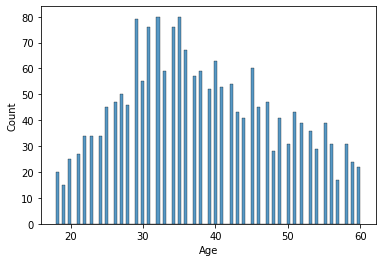

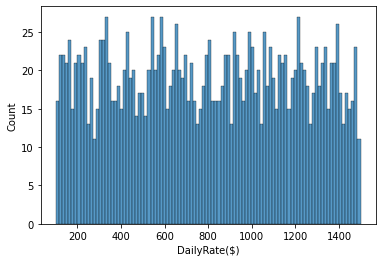

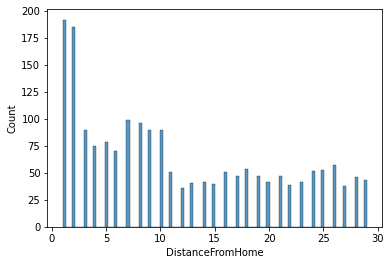

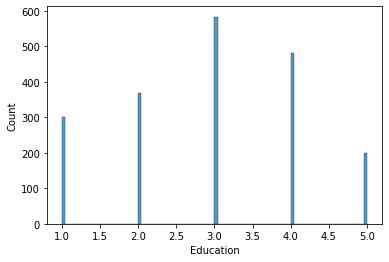

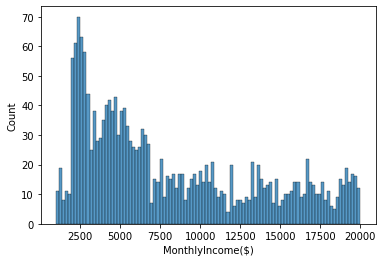

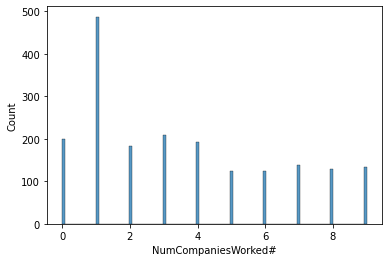

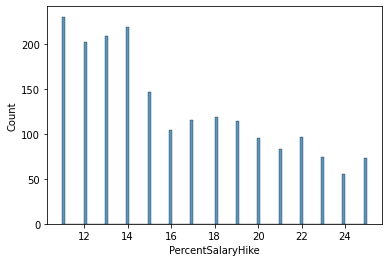

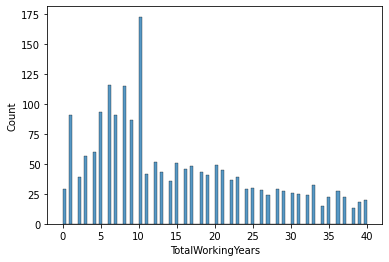

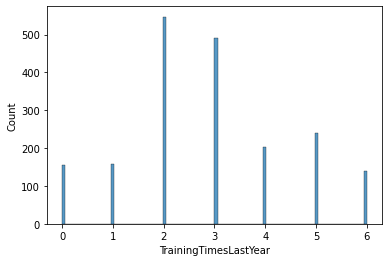

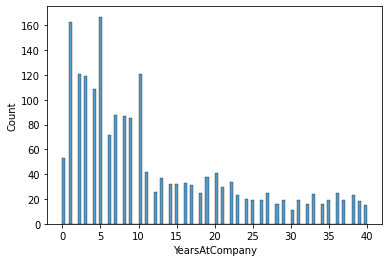

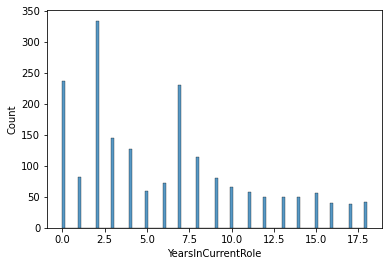

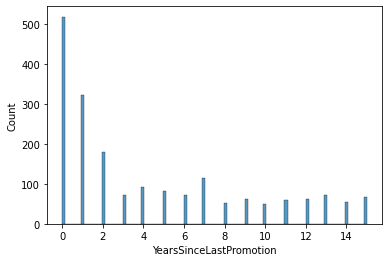

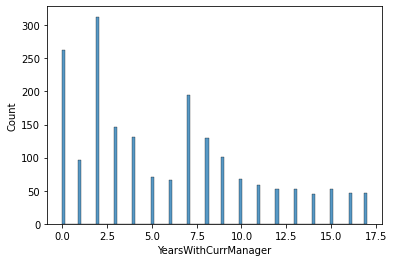

In [ ]:
for num_ft in numeric_feature_columns:
    ax = sns.histplot(x=num_ft, bins=100, data=X_train)
    plt.show()

### Preprocessing Pipeline

In [ ]:
## Normal Features
normal_features = ["Education", "TrainingTimesLastYear"]
normal_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")),
           ("std_scaler", StandardScaler()),
           ("min_max_scaler", MinMaxScaler())
           ]
)

## Skewed Features
skewed_features = [num_ft for num_ft in numeric_feature_columns if num_ft not in normal_features]
def log_transform(x):
    # print(x)
    return np.log(x + 1)

log_transformer = FunctionTransformer(log_transform)
skewed_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="mean")),
        #    ("log_transform", log_transformer),
           ("std_scaler", StandardScaler()),
           ("min_max_scaler", MinMaxScaler())
           ]
)

## categorical Features
drop_first = None
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")), 
           ("label_encoder", OneHotEncoder(drop=drop_first))
           ]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("normal", normal_transformer, normal_features),
        ("skewed", skewed_transformer, skewed_features),
        ("cat", cat_transformer, categorical_feature_columns)
    ]
)

In [ ]:
import copy
preprocessor2 = copy.deepcopy(preprocessor)

In [ ]:
def acceptable_type(value):
    if isinstance(value, str):
        return True
    else:
        try:
            value = int(value)
            return True
        except:
            return False        

In [ ]:
onehot_encoded_categorical_feature_columns = []
# cat_fts = []
# uniq_vals = []
# val_types = []
for cat_ft in categorical_feature_columns:
    ft_uniq_values = X_train[cat_ft].unique()
    ft_uniq_values = [val for val in ft_uniq_values if acceptable_type(val)]
    if drop_first == "first":
        start_index = 1
    else:
        start_index = 0
    for uniq_val in ft_uniq_values[start_index:]:
        # cat_fts.append(cat_ft)
        # uniq_vals.append(uniq_val)
        # val_types.append(type(uniq_val))
        onehot_encoded_categorical_feature_columns.append(f"{cat_ft}_{uniq_val}")


# pd.DataFrame({"feature": cat_fts,
#               "value": uniq_vals,
#               "type": val_types
#               })

In [ ]:
all_new_features = numeric_feature_columns + onehot_encoded_categorical_feature_columns

In [ ]:
len(all_features), len(all_new_features)

(28, 68)

In [ ]:
drivers_data = pd.DataFrame(preprocessor2.fit_transform(X_train), columns=all_new_features)
drivers_data.head()

,Age,DailyRate($),DistanceFromHome,Education,MonthlyIncome($),NumCompaniesWorked#,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Medical,EducationField_Life Sciences,EducationField_Marketing,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_4,EnvironmentSatisfaction_3,EnvironmentSatisfaction_1,JobLevel_3,JobLevel_4,JobLevel_2,JobLevel_5,JobLevel_1,Job+Role_Human Resources,Job+Role_Research Scientist,Job+Role_Sales Executive,Job+Role_Manager,Job+Role_Laboratory Technician,Job+Role_Manufacturing Director,Job+Role_Research Director,Job+Role_Healthcare Representative,Job+Role_Sales Representative,JobSatisfaction_3,JobSatisfaction_4,JobSatisfaction_2,JobSatisfaction_1,MaritalStatus_Married,MaritalStatus_Divorced,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_4,PerformanceRating_3,StockOptionLevel_1.0,StockOptionLevel_0.0,StockOptionLevel_2.0,StockOptionLevel_3.0,WorkLifeBalance_3,WorkLifeBalance_2,WorkLifeBalance_1,WorkLifeBalance_4,isNumCompaniesWorkedMissing_False,isNumCompaniesWorkedMissing_True,isYearsSinceLastPromotionMissing_False,isYearsSinceLastPromotionMissing_True,isYearsInCurrentRoleMissing_False,isYearsInCurrentRoleMissing_True
0,1.00,0.166667,0.095238,0.053009,0.000000,0.604476,0.777778,0.928571,0.400,0.125,0.611111,0.066667,0.823529,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.50,0.666667,0.547619,0.964183,0.178571,0.283254,0.888889,0.857143,0.775,0.325,0.666667,0.133333,0.470588,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.50,0.333333,0.690476,0.081662,0.071429,0.671985,1.000000,0.071429,0.700,0.550,0.111111,0.733333,0.764706,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.50,0.333333,0.952381,0.359599,0.714286,0.888152,0.444444,0.142857,0.725,0.025,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.25,0.333333,0.690476,0.967765,0.750000,0.296261,0.444444,0.428571,0.700,0.475,0.111111,0.666667,0.352941,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


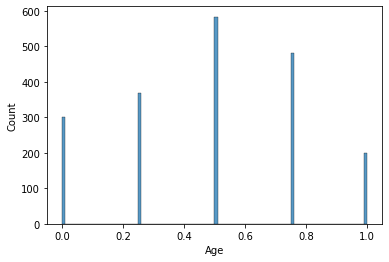

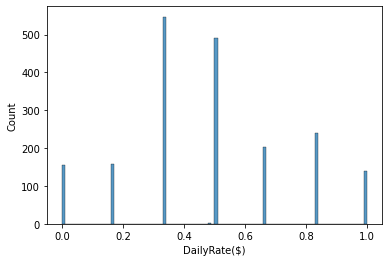

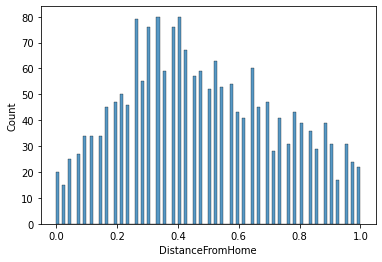

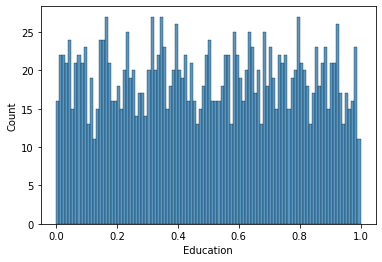

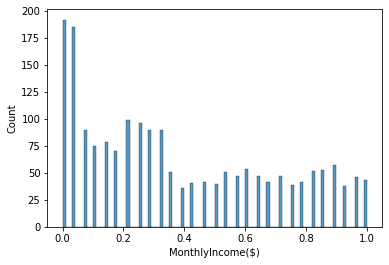

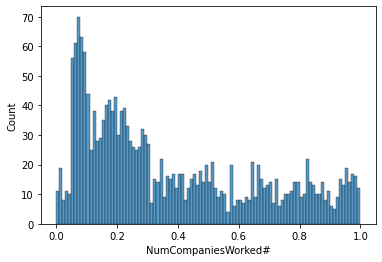

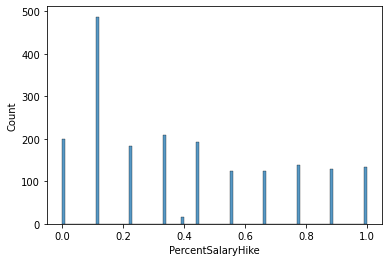

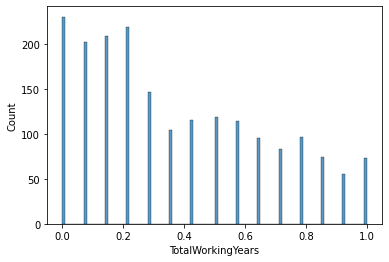

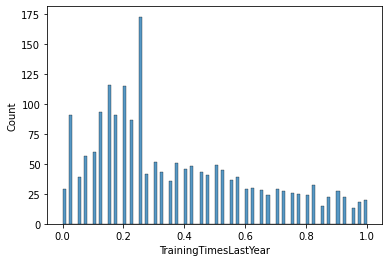

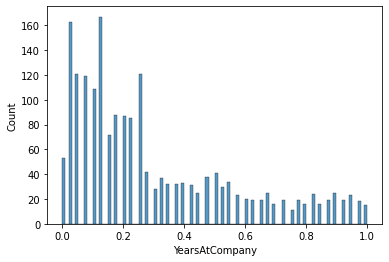

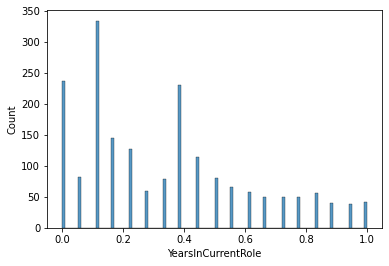

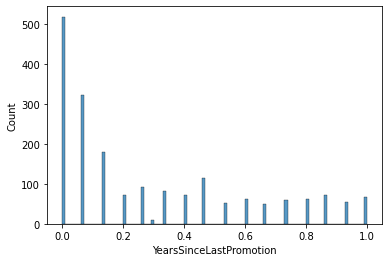

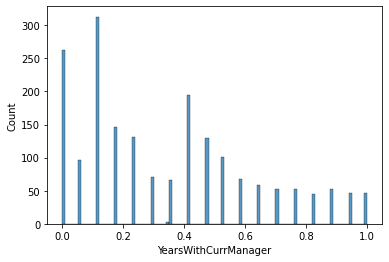

In [ ]:
for num_ft in numeric_feature_columns:
    ax = sns.histplot(x=num_ft, bins=100, data=drivers_data)
    plt.show()

## What are the drivers of attrition?

This will be determined by the feature importance

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import r2_score

In [ ]:
num_top_features = 20
select = SelectKBest(chi2, k=num_top_features).fit(drivers_data, 
                                                   y_train)
indices_selected = select.get_support(indices=True)
selected_colnames = [drivers_data.columns[i] for i in indices_selected]

In [ ]:
chi2_scores = pd.DataFrame(
    {'feature': drivers_data.columns,
     'chi2_score': select.scores_,
    })
chi2_scores.sort_values(by="chi2_score", ascending=False, inplace=True)
chi2_scores.head(num_top_features)

,feature,chi2_score
11,YearsSinceLastPromotion,140.947662
53,PerformanceRating_3,140.181646
58,WorkLifeBalance_3,104.613632
51,OverTime_Yes,102.457300
60,WorkLifeBalance_1,96.362528
9,YearsAtCompany,89.208855
15,BusinessTravel_Travel_Rarely,84.754307
57,StockOptionLevel_3.0,74.538308
50,OverTime_No,66.183056
49,MaritalStatus_Single,64.370946


In [ ]:
union = FeatureUnion([('feature_selection', select)])

## Can we predict if employee will leave the company? [Modeling]

yes. using above attributes we can build a binary classification model to predict if employee is likely to leave

#### Metrics used
* Precision: if we say someone is going to leave, how many of those yes prediction are correct?
* Recall: if we know that a set of people are going to leave, how many were we able to detect?
* F1: metric that informs both precision & recall
* accuracy: Fairly good metric to use in non imbalanced cases like this one

### Decision Tree

 hyper parameter tuning we select depth of tree in random forest and decision tree as 5 so that it does not over fit

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2

import scipy.stats as stats

from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

In [ ]:
clf_dt = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("feature_selection", union),
           ("classifier", DecisionTreeClassifier(max_depth=5))]
)

clf_dt = clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

In [ ]:
ft_imp_df_dt = pd.DataFrame({"feature": selected_colnames,
                             "importance": clf_dt.steps[-1][1].feature_importances_})
ft_imp_df_dt = pd.merge(ft_imp_df_dt, chi2_scores.head(num_top_features), on="feature", how="left")
ft_imp_df_dt.sort_values("importance", ascending=False)

,feature,importance,chi2_score
1,YearsAtCompany,0.419627,89.208855
3,YearsSinceLastPromotion,0.212203,140.947662
4,YearsWithCurrManager,0.140807,45.386577
12,OverTime_No,0.059387,66.183056
0,MonthlyIncome($),0.058789,44.867804
2,YearsInCurrentRole,0.046522,48.970363
17,StockOptionLevel_3.0,0.019262,74.538308
7,BusinessTravel_Travel_Rarely,0.015216,84.754307
19,WorkLifeBalance_1,0.012474,96.362528
8,JobLevel_4,0.006148,49.148533


In [ ]:
target_values = le.inverse_transform([0, 1])

In [ ]:
cm_numpy = confusion_matrix(y_test, y_pred_dt )
df_cm = pd.DataFrame(cm_numpy, index = [f"Actual: {i}" for i in target_values],
                  columns = [f"Predicted: {i}" for i in target_values])
df_cm["Total"] = df_cm.T.sum()
df_cm

,Predicted: No,Predicted: Yes,Total
Actual: No,239,17,256
Actual: Yes,65,163,228


In [ ]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_dt)
avg_precision, avg_recall, avg_f1, avg_support = precision_recall_fscore_support(y_test, y_pred_dt, average="weighted")
performance_df_dt = pd.DataFrame({"precision": precision.tolist(),
                                "recall": recall.tolist(),
                                "f1": f1.tolist()
                                })
performance_df_dt = performance_df_dt.reset_index()
performance_df_dt.columns = ["class", "precision", "recall", "f1"]
performance_df_dt["class"] = le.inverse_transform(performance_df_dt["class"])
performance_df_dt = performance_df_dt.append({"class": "Weighted Average", 
                                        "precision": avg_precision,
                                        "recall": avg_recall,
                                        "f1": avg_f1,
                                        },
                                        ignore_index=True
                                        )

performance_df_dt

,class,precision,recall,f1
0,No,0.786184,0.933594,0.853571
1,Yes,0.905556,0.714912,0.799020
2,Weighted Average,0.842417,0.830579,0.827873


In [ ]:
model_name = "Decision Tree"
performance_df_dt["model"] = model_name

In [ ]:
acc_df_dt = pd.DataFrame({"model": [model_name],
                          "accuracy": [accuracy_score(y_test, y_pred_dt)]
                          })

In [ ]:
acc_df_dt

,model,accuracy
0,Decision Tree,0.830579


In [ ]:
from sklearn import tree
from graphviz import Source

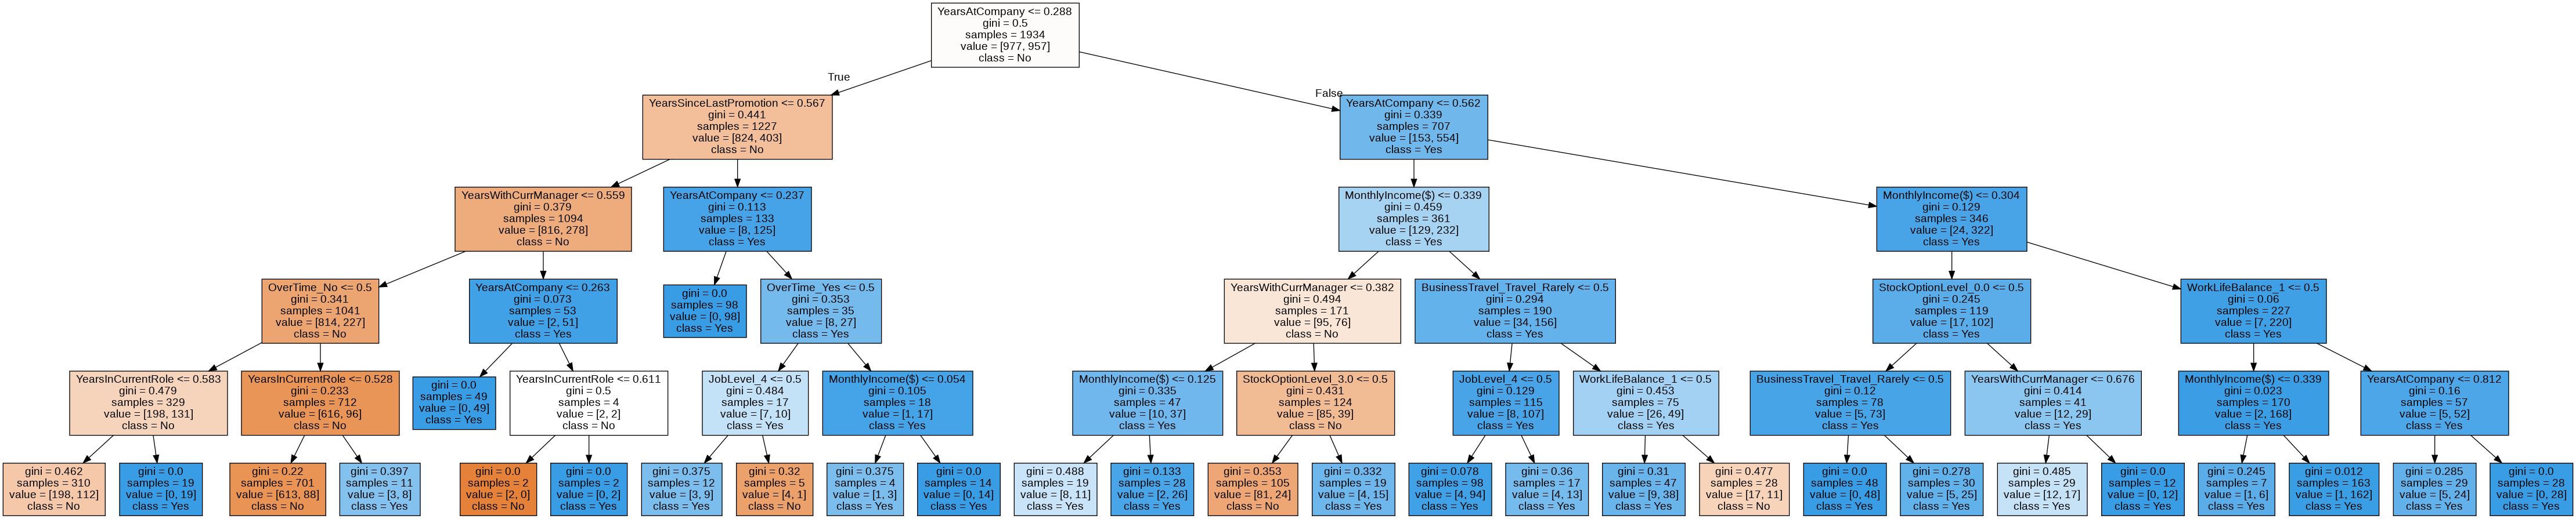

In [ ]:
graph = Source( tree.export_graphviz(clf_dt.steps[-1][1], 
                                     out_file=None, 
                                     class_names=target_values,
                                     filled=True,
                                     feature_names=selected_colnames))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

### Random Forest

In [ ]:
clf_rf = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("feature_selection", union),
           ("classifier", RandomForestClassifier(n_estimators=100,
                                                 max_depth=5,
                                                 random_state=42))]
)

clf_rf = clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

In [ ]:
ft_imp_df_rf = pd.DataFrame({"feature": selected_colnames,
                             "importance": clf_rf.steps[-1][1].feature_importances_})
ft_imp_df_rf = pd.merge(ft_imp_df_rf, chi2_scores.head(num_top_features), on="feature", how="left")
ft_imp_df_rf.sort_values("importance", ascending=False)

,feature,importance,chi2_score
1,YearsAtCompany,0.209631,89.208855
3,YearsSinceLastPromotion,0.194530,140.947662
2,YearsInCurrentRole,0.112474,48.970363
4,YearsWithCurrManager,0.082013,45.386577
0,MonthlyIncome($),0.076860,44.867804
7,BusinessTravel_Travel_Rarely,0.047347,84.754307
15,PerformanceRating_3,0.047328,140.181646
19,WorkLifeBalance_1,0.046899,96.362528
12,OverTime_No,0.045116,66.183056
13,OverTime_Yes,0.034884,102.457300


In [ ]:
cm_numpy = confusion_matrix(y_test, y_pred_rf)
df_cm = pd.DataFrame(cm_numpy, index = [f"Actual: {i}" for i in target_values],
                  columns = [f"Predicted: {i}" for i in target_values])
df_cm["Total"] = df_cm.T.sum()
df_cm

,Predicted: No,Predicted: Yes,Total
Actual: No,230,26,256
Actual: Yes,49,179,228


In [ ]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_rf)
avg_precision, avg_recall, avg_f1, avg_support = precision_recall_fscore_support(y_test, y_pred_rf, average="weighted")
performance_df_rf = pd.DataFrame({"precision": precision.tolist(),
                                "recall": recall.tolist(),
                                "f1": f1.tolist()
                                })
performance_df_rf = performance_df_rf.reset_index()
performance_df_rf.columns = ["class", "precision", "recall", "f1"]
performance_df_rf["class"] = le.inverse_transform(performance_df_rf["class"])
performance_df_rf = performance_df_rf.append({"class": "Weighted Average", 
                                        "precision": avg_precision,
                                        "recall": avg_recall,
                                        "f1": avg_f1,
                                        },
                                        ignore_index=True
                                        )
performance_df_rf

,class,precision,recall,f1
0,No,0.824373,0.898438,0.859813
1,Yes,0.873171,0.785088,0.826790
2,Weighted Average,0.847360,0.845041,0.844257


In [ ]:
model_name = "Random Forest Classifier"
performance_df_rf["model"] = model_name

In [ ]:
acc_df_rf = pd.DataFrame({"model": [model_name],
                          "accuracy": [accuracy_score(y_test, y_pred_rf)]
                          })
acc_df_rf

,model,accuracy
0,Random Forest Classifier,0.845041


### Naive Bayes

In [ ]:
clf_nb = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("feature_selection", union),
           ("classifier", GaussianNB())]
)

clf_nb = clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)

In [ ]:
cm_numpy = confusion_matrix(y_test, y_pred_nb)
df_cm = pd.DataFrame(cm_numpy, index = [f"Actual: {i}" for i in target_values],
                  columns = [f"Predicted: {i}" for i in target_values])
df_cm["Total"] = df_cm.T.sum()
df_cm

,Predicted: No,Predicted: Yes,Total
Actual: No,214,42,256
Actual: Yes,37,191,228


In [ ]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_nb)
avg_precision, avg_recall, avg_f1, avg_support = precision_recall_fscore_support(y_test, y_pred_nb, average="weighted")
performance_df_nb = pd.DataFrame({"precision": precision.tolist(),
                                "recall": recall.tolist(),
                                "f1": f1.tolist()
                                })
performance_df_nb = performance_df_nb.reset_index()
performance_df_nb.columns = ["class", "precision", "recall", "f1"]
performance_df_nb["class"] = le.inverse_transform(performance_df_nb["class"])
performance_df_nb = performance_df_nb.append({"class": "Weighted Average", 
                                        "precision": avg_precision,
                                        "recall": avg_recall,
                                        "f1": avg_f1,
                                        },
                                        ignore_index=True
                                        )
performance_df_nb

,class,precision,recall,f1
0,No,0.852590,0.835938,0.844181
1,Yes,0.819742,0.837719,0.828633
2,Weighted Average,0.837116,0.836777,0.836857


In [ ]:
model_name = "Naive Bayes"
performance_df_nb["model"] = model_name

In [ ]:
acc_df_nb = pd.DataFrame({"model": [model_name],
                          "accuracy": [accuracy_score(y_test, y_pred_nb)]
                          })
acc_df_nb

,model,accuracy
0,Naive Bayes,0.836777


### Support Vector Machines

In [ ]:
clf_svc = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("feature_selection", union),
           ("classifier", SVC())]
)

clf_svc = clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)

In [ ]:
cm_numpy = confusion_matrix(y_test, y_pred_svc)
df_cm = pd.DataFrame(cm_numpy, 
                     index = [f"Actual: {i}" for i in target_values],
                     columns = [f"Predicted: {i}" for i in target_values])
df_cm["Total"] = df_cm.T.sum()
df_cm

,Predicted: No,Predicted: Yes,Total
Actual: No,231,25,256
Actual: Yes,43,185,228


In [ ]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_svc)
avg_precision, avg_recall, avg_f1, avg_support = precision_recall_fscore_support(y_test, y_pred_svc, average="weighted")
performance_df_svc = pd.DataFrame({"precision": precision.tolist(),
                                "recall": recall.tolist(),
                                "f1": f1.tolist()
                                })
performance_df_svc = performance_df_svc.reset_index()
performance_df_svc.columns = ["class", "precision", "recall", "f1"]
performance_df_svc["class"] = le.inverse_transform(performance_df_svc["class"])
performance_df_svc = performance_df_svc.append({"class": "Weighted Average", 
                                        "precision": avg_precision,
                                        "recall": avg_recall,
                                        "f1": avg_f1,
                                        },
                                        ignore_index=True
                                        )
performance_df_svc

,class,precision,recall,f1
0,No,0.843066,0.902344,0.871698
1,Yes,0.880952,0.811404,0.844749
2,Weighted Average,0.860913,0.859504,0.859003


In [ ]:
model_name = "Support Vector Machines"
performance_df_svc["model"] = model_name

In [ ]:
acc_df_svc = pd.DataFrame({"model": [model_name],
                          "accuracy": [accuracy_score(y_test, y_pred_svc)]
                          })
acc_df_svc

,model,accuracy
0,Support Vector Machines,0.859504


## All Performances

In [ ]:
all_performance_df = pd.concat([performance_df_dt,
                                performance_df_rf,
                                performance_df_nb,
                                performance_df_svc,
                                ],
                               ignore_index=True
                               )
all_performance_df = all_performance_df[["model", "class", "precision", "recall", "f1"]]
all_performance_df.sort_values("f1", ascending=False, inplace=True)
all_performance_df[all_performance_df["class"] == "Weighted Average"]

,model,class,precision,recall,f1
11,Support Vector Machines,Weighted Average,0.860913,0.859504,0.859003
5,Random Forest Classifier,Weighted Average,0.847360,0.845041,0.844257
8,Naive Bayes,Weighted Average,0.837116,0.836777,0.836857
2,Decision Tree,Weighted Average,0.842417,0.830579,0.827873


In [ ]:
all_acc_df = pd.concat([acc_df_dt,
                        acc_df_rf,
                        acc_df_nb,
                        acc_df_svc,
                        ],
                        ignore_index=True)
all_acc_df.sort_values("accuracy", ascending=False, inplace=True)
all_acc_df

,model,accuracy
3,Support Vector Machines,0.859504
1,Random Forest Classifier,0.845041
2,Naive Bayes,0.836777
0,Decision Tree,0.830579
